In [76]:
#@title
import base64
def codifica(clean_text):
  encoded = base64.b64encode(clean_text)
  print(encoded)
  
def show_code(text_encoded):
  data = base64.b64decode(text_encoded).decode('utf8')
  print(data.replace('\\n', '\n').replace('\\t', '\t'))

# Ahora te toca a ti

Las soluciones están "encriptadas", si quieres ver la solución, utiliza la función ```show_code(text)``` sutityendo ```text``` por la cadena oculta.

Por ejemplo:

Decodifica el siguiente texto

```show_code('SGFzIGRlY29kaWZpY2FkbyBlbCBtZW5zYWpl')```


In [38]:
show_code('SGFzIGRlY29kaWZpY2FkbyBlbCBtZW5zYWpl')

Has decodificado el mensaje


Generamos los valores aleatorios para poder repetir el experimento

In [14]:
import random as rn
import numpy as np
np.random.seed(42)
rn.seed(12345)
import base64

# Definimos el juego

In [77]:
#@title class NinjaCastle()
import numpy as np
# rewards = np.array([[0, 0, -100, 0],
#                          [0, 0, -100, 0],
#                          [0, 0, 0, 0],
#                          [0, 0, 0, 100]])

class NinjaCastle():
    action_space = {
        '👆🏽': np.array([-1, 0]), 
        '👇🏽': np.array([1, 0]),
        '👈': np.array([0, -1]),
        '👉': np.array([0, 1])
    }
    state = np.array([0, 0])  # where is the ninja
    total_reward = 0
    _rewards = np.array([[0, 0, -100, 0],
                         [0, 0, -100, 0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 100]])
    positions_space = _rewards.shape  # inside reward

    _step_penalization = -1
    _final_state = np.array([3, 3])

    def __init__(self,state_as_img=False):
      self.state_as_img=state_as_img

    def make_state(self):
      if self.state_as_img:
        place = self._rewards.astype(str)
        place[self.state[0], self.state[1]] = '1'
        return place
      else:
        return np.copy(self.state)

    def reset(self):
        self.total_reward = 0
        self.state = [0, 0]
        return self.make_state()

    def render(self):
        place = self._rewards.astype(str)
        place[self.state[0], self.state[1]] = '👦'
        print(place)

    def step(self, action):
        self._apply_action(action)
        done = np.array_equal(self.state, self._final_state)  # final
        info = ""
        reward = self._rewards[self.state[0], self.state[1]]
        reward += self._step_penalization
        self.total_reward += reward
        return self.make_state(), reward, done, info

    def _apply_action(self, action):
        self.state += self.action_space[action]
        if self.state[0] > self._rewards.shape[0] - 1:
            self.state[0] = self._rewards.shape[0] - 1
        elif self.state[0] < 0:
            self.state[0] = 0

        if self.state[1] > self._rewards.shape[1] - 1:
            self.state[1] = self._rewards.shape[1] - 1
        elif self.state[1] < 0:
            self.state[1] = 0


Creamos el objeto game con el juego que vamos a utilizar

In [78]:
game=NinjaCastle()

La posibles acciones del juego se toman de la variable *action_space* del propio juego

In [12]:
# Estas son las posibles acciones del juego
game.action_space.keys()

dict_keys(['👆🏽', '👇🏽', '👈', '👉'])

# Para jugar al juego:
### **Reseteamos el juego** 
```state=game.reset()```

Tenemos el estado inicial del juego ```state```
### **Vamos dando pasos** 
```new_state, reward, done,info =game.step('👉')```

Nos devuelve un nuevo estado ```new_state```, una recompensa ```reward```, si ha terminado el juego ```done``` y algo de información ```info```
### **Pintamos el juego**
```game.render()```




# Definimos la q_table

Recuerda, queremos guardar por cada posición posible del juego un valor para cada una de las acciones posibles.

Utiliza np.zeros(TUPLA DIMENSIONES) para crear la matriz 4x4x4

In [42]:
game.positions_space

(4, 4)

In [48]:
q_table = 

(4, 4, 4)

*Resultado*
show_code('cG9zaXRpb24gPSBsaXN0KGdhbWUucG9zaXRpb25zX3NwYWNlKQpwb3NpdGlvbi5hcHBlbmQobGVuKGFjdGlvbl9zcGFjZSkpCnFfdGFibGUgPSBucC56ZXJvcyhwb3NpdGlvbikKcV90YWJsZS5zaGFwZQ==')


# Algoritmo SARS'A'
Hay que programar la forma de elegir la siguiente acción
y la ecuación de bellman
```
while max_steps or done:
    accion = elegir_accion[azar,Q(s)]
    s', reward, done, info = env.step(accion)
    a' = elegir_accion[azar,Q(s')]
    Q*(s,a) = bellman(s,a,s',a',r)
```

## Elección del siguiente paso

Para elegir el siguiente paso elegimos un valor al azar:
* Si es mayor o igual que el ratio de explotación: Exploramos cogiendo una acción aleatoria.
* Si es menor que el ratio de explotacion: Explotamos
  * Sólo un valor máximo: esa acción
  * Más de un valor máximo: aleatorio entre ellas


Resultado:
show_code('CmRlZiBnZXRfbmV4dF9zdGVwKGdhbWUscV90YWJsZSxzdGF0ZSxyYXRpb19leHBsb3RhY2lvbik6CiAgY2FuZGlkYXRlX25leHRfc3RlcCA9IG5wLnJhbmRvbS5jaG9pY2UobGlzdChnYW1lLmFjdGlvbl9zcGFjZSkpCiAgaWRfYWNjaW9uPWxpc3QoZ2FtZS5hY3Rpb25fc3BhY2UpLmluZGV4KGNhbmRpZGF0ZV9uZXh0X3N0ZXApCiAgaWYgbnAucmFuZG9tLnVuaWZvcm0oKSA8PSByYXRpb19leHBsb3RhY2lvbjoKICAgICMgdGFrZSBtYXggdW5sZXNzIHRpZSwgdGhlbiByYW5kb20KICAgIGlkX2FjY2lvbiA9IG5wLnJhbmRvbS5jaG9pY2UobnAuZmxhdG5vbnplcm8oCiAgICAgICAgcV90YWJsZVtzdGF0ZVswXSwgc3RhdGVbMV1dID09IHFfdGFibGVbc3RhdGVbMF0sIHN0YXRlWzFdXS5tYXgoKSAKICAgICkpCiAgICBjYW5kaWRhdGVfbmV4dF9zdGVwID0gbGlzdChnYW1lLmFjdGlvbl9zcGFjZSlbaWRfYWNjaW9uXQogIHJldHVybiBjYW5kaWRhdGVfbmV4dF9zdGVwLCBpZF9hY2Npb24K')

In [ ]:
def get_next_step(game,q_table,state,ratio_explotacion):
  # take max unless tie, then random
  if np.random.uniform() <= ratio_explotacion:
    id_accion=
    ...
    q_table[state[0], state[1]].max()
    ...
  return candidate_next_step, id_accion

In [68]:
s= game.reset()
q_table[s[0],s[1]]=[1,0,0,0]

print("Explotando")
for _ in range(10):
  print(get_next_step(game,q_table,s,1),end="")

print("\n\nExplotando bastante")
for _ in range(10):
  print(get_next_step(game,q_table,s,0.7),end="")


print("\n\nExplorando")
for _ in range(10):
  print(get_next_step(game,q_table,s,0),end="")
  

Explotando
('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)

Explotando bastante
('👆🏽', 0)('👇🏽', 1)('👆🏽', 0)('👆🏽', 0)('👆🏽', 0)('👇🏽', 1)('👆🏽', 0)('👉', 3)('👆🏽', 0)('👆🏽', 0)

Explorando
('👆🏽', 0)('👇🏽', 1)('👆🏽', 0)('👈', 2)('👆🏽', 0)('👉', 3)('👈', 2)('👉', 3)('👉', 3)('👆🏽', 0)

## Ecuacion de Bellman para SARS'A'

\begin{equation}
\underbrace{\text{New}Q(s,a)}_{\scriptstyle\text{New Q-Value}}={Q(s,a)}+\mkern-34mu\underset{\text{Learning Rate}}{\underset{\Bigl|}{\alpha}}\mkern-30mu[\underbrace{R(s,a)}_{\scriptstyle\text{Reward}}+\mkern-30mu\underset{\text{Discount rate}}{\underset{\Biggl|}{\gamma }}\mkern-75mu\overbrace{\ Q'(s',a')}^{\scriptstyle\substack{\text{Predicted reward, given} \\ \text{new state and all next action}}}\mkern-45mu-Q(s,a)]
\end{equation}

Resultado
show_code('CmRlZiBhcHJlbmRpemFqZV9hX2NvcnRvX3lfbGFyZ29fcGxhem9fc2Fyc2EodmFsb3JfcV9hY3R1YWwsIHJld2FyZCwgb3BjaW9uZXNfcV9mdXR1cm8sIGlkeF9hY2Npb25fdG9tYWRhLGxlYXJuaW5nX3JhdGU9MC4xLGRpc2NvdW50X2ZhY3Rvcj0wLjEpOgogICMgbWVqb3Jfb3BjaW9uX2Z1dHVybyA9IG9wY2lvbmVzX3FfZnV0dXJvLm1heCgpICNzYXJzCiAgb3BjaW9uX2Z1dHVyYV90b21hZGEgPSBvcGNpb25lc19xX2Z1dHVyb1tpZHhfYWNjaW9uX3RvbWFkYV0KICBhcHJlbmRpemFqZV9hX2NvcnRvX3lfbGFyZ28gPSB2YWxvcl9xX2FjdHVhbCArIGxlYXJuaW5nX3JhdGUqKHJld2FyZCAtIHZhbG9yX3FfYWN0dWFsICsgKGRpc2NvdW50X2ZhY3RvciAqIG9wY2lvbl9mdXR1cmFfdG9tYWRhKSkKICByZXR1cm4gYXByZW5kaXphamVfYV9jb3J0b195X2xhcmdvCg==')

In [ ]:
def aprendizaje_a_corto_y_largo_plazo_sarsa(
    valor_q_actual, reward, opciones_q_futuro, idx_accion_tomada,
    learning_rate=0.1,discount_factor=0.1):
  opcion_futura_tomada = opciones_q_futuro[idx_accion_tomada]
  aprendizaje_a_corto_y_largo = valor_q_actual + learning_rate*(...)
  return aprendizaje_a_corto_y_largo

In [70]:
for _ in range(10):
  new_q_value =aprendizaje_a_corto_y_largo_plazo_sarsa(
          q_table[0,0,0],
          10,
          q_table[0,1],
          3#id ir derecha
          )
  q_table[0,0,0] = new_q_value
  print(new_q_value)

1.9
2.71
3.439
4.0951
4.68559
5.217031
5.6953279000000006
6.12579511
6.5132155990000005
6.8618940391


In [85]:

def sarsa(ratio_explotacion = 0.95):

  discount_factor = 0.1

  game.reset()
  game.render()

  q_table = np.zeros((4,4,4))
  resultados=[]

  for n_game in range(100): # juegos
    state = game.reset()
    tot_rew=0
    for _ in range(100): # vueltas
      next_step, id_accion = get_next_step(game,q_table,state,ratio_explotacion)
      state_new, reward, done, info = game.step(next_step)
      tot_rew+=reward

      #SARSA
      next_post_action,_ = get_next_step(game,q_table,state_new,ratio_explotacion)
      # print(f"a{next_step} a'{next_post_action}")

      #actualizamos q_table
      aprendizaje_a_corto_y_largo= aprendizaje_a_corto_y_largo_plazo_sarsa(
          valor_q_actual=q_table[state[0],state[1],id_accion],
          reward=reward,
          opciones_q_futuro=q_table[state_new[0], state_new[1]],
          idx_accion_tomada=list(game.action_space).index(next_post_action) #SARSA
          )
      q_table[state[0],state[1],id_accion] = aprendizaje_a_corto_y_largo

      state = state_new
      if done:
        resultados.append(tot_rew)
        break;
  print(q_table)
  return resultados

[['👦' '0' '-100' '0']
 ['0' '0' '-100' '0']
 ['0' '0' '0' '0']
 ['0' '0' '0' '100']]
[[[ -1.10973466  -1.10963259  -1.11064777  -1.24486765]
  [ -1.07718419  -1.0780883   -1.07952998 -19.19      ]
  [  0.         -10.1         -0.10995471  -0.1       ]
  [ -0.1         -0.1          0.           0.        ]]

 [[ -1.09940722  -1.09849094  -1.0990636   -1.09844492]
  [ -1.02508014  -1.02324105  -1.03772827 -27.3729    ]
  [-10.1         -0.17986584  -0.20021392  -0.1       ]
  [  0.          -0.1        -10.1         -0.1       ]]

 [[ -1.01177163  -1.00571827  -1.005892    -1.00427988]
  [ -0.60622739  -0.24390587  -0.59730835  -0.60867054]
  [-10.1         -0.1         -0.1019       2.6896883 ]
  [  0.          71.03947589   0.           0.        ]]

 [[ -0.54824722  -0.5369322   -0.53630817  -0.21604506]
  [ -0.19504269  -0.16607427  -0.1          8.80724873]
  [ -0.15506372   0.88728846  -0.19433858  98.99068944]
  [  0.           0.           0.           0.        ]]]


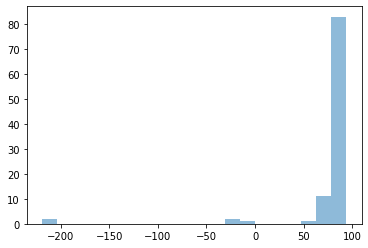

In [86]:
import matplotlib.pyplot as plt

resultados=sarsa()
plt.hist(resultados, bins=20, alpha=0.5);